# Monte carlo simulations for FYS4711

##### Introduction
In this report we will look at python simulations for photons

In [3]:
import numpy as np 
from numpy import pi, log, exp, cos, sin
import matplotlib.pyplot as plt

min, max = 50, 2000      #min and max photon energy in kev
nv = 3.43e23             #number of electrons in water per cubic centimeter 

###### Task 1
in this task we 

i made a function that

In [5]:

def atten_coef(hv):        #takes in photon energy hv as input,calculates K-N cross section per electron (ATTIX 7.15)

    #using constants and calculating alpha from given energy
    radius = 2.818e-13
    m0c = 0.511 #MeV
    alpha = hv/m0c 
    
    #electronic cross section for Compton scattering
    sigma  = 2*pi*(
        radius**2 * ( ((1+alpha)/(alpha**2)) * (2*(1+alpha)/(1+2*alpha) 
        - log(1+2*alpha)/alpha)
        + log(1+2*alpha)/(alpha*2) 
        - (1+3*alpha)/((1+2*alpha)**2))
        )

    #calculating attenuation coefficient
    mu = sigma * nv

    return mu #returns attenuation coefficient

For the next part we will print the specified values that task 1 asks us

In [6]:
pub_200, pub2 = 0.137, 0.049  #published values
low_en, high_en = atten_coef(0.2), atten_coef(2)
low_per, high_per = 100*((atten_coef(0.2)-pub_200)/atten_coef(0.2)), 100*((atten_coef(2)-pub2)/atten_coef(2))

#printing specified values and comparing with published values
print(f"The attenuation coefficient for 200KeV is:          {low_en:.3f} cm-1")
print(f'percent difference from published value for 200KeV: {low_per:.1f}%')

print(f'The attenuation coefficient for 2MeV is:            {high_en:.3f} cm-1')
print(f'percent difference from published value for 2MeV:   {high_per:.1f}%')


The attenuation coefficient for 200KeV is:          0.139 cm-1
percent difference from published value for 200KeV: 1.7%
The attenuation coefficient for 2MeV is:            0.050 cm-1
percent difference from published value for 2MeV:   2.4%


Nextly we will visualise task 1

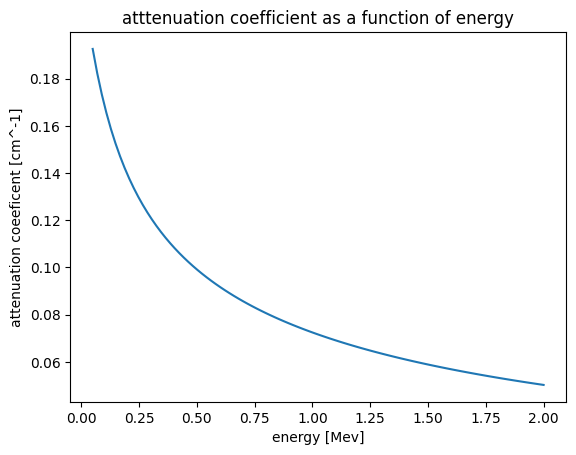

In [8]:
def plot_task1():
    energy = np.linspace(min/1000, max/1000, 100)

    plt.title('atttenuation coefficient as a function of energy')
    plt.ylabel('attenuation coeeficent [cm^-1]')
    plt.xlabel('energy [Mev]')

    plt.plot(energy, atten_coef(energy))
    plt.show()

plot_task1()

##### task 2

In [9]:
x = np.linspace(0, 50, 100)

def PD(hv, x):               #Probability Distrubution, takes in energy as argument
    mu = atten_coef(hv)      #uses function from task1
    pd = mu * exp(mu*(-x))   #probability distubutuion formula
    return pd


def CD(hv, x):               #Cumalative Distrubution, takes in energy as argument
    mu = atten_coef(hv)      #uses function from task1
    cd = 1 - exp(mu*(-x))    #cumalative distrubution formula
    return cd

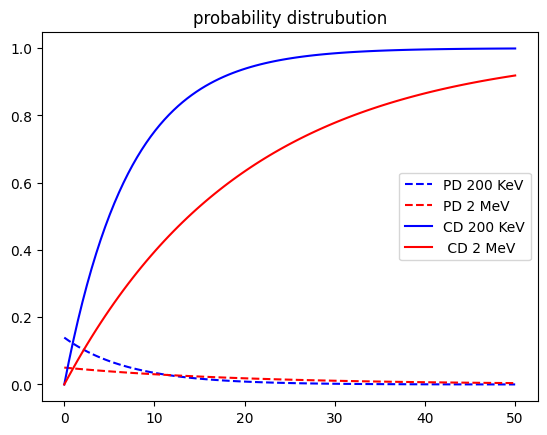

In [10]:
def plot_task2():
    plt.title('probability distrubution')
    plt.plot(x, PD(0.2, x), 'b--')
    plt.plot(x, PD(2, x),'r--') 
    #plt.legend(['PD 200 KeV', 'PD 2 MeV'])
    #plt.show()

    #plt.title('cumalative distrubution')
    plt.plot(x, CD(0.2, x),'b-')
    plt.plot(x, CD(2, x), 'r-')
    #plt.legend(['CD 200 KeV', ' CD 2 MeV'])

    plt.legend(['PD 200 KeV', 'PD 2 MeV', 'CD 200 KeV', ' CD 2 MeV'])
    
    plt.show()

plot_task2()

##### task 3

In [12]:

def paths(hv):                                      #runs path siumulation for 1000 photons for given photon energy
    mu = atten_coef(hv)                             #either 2MeV or 200KeV
    tot_phot = 1000
    path_list = np.zeros(tot_phot)
    for i in range(tot_phot):
        path_list[i] = -log(1-np.random.randint(0, 100)/100)/mu  #using formula x = -log(1-u)

    mean = np.mean(path_list)                           #mean value of sampled events

    #the randit method fins a number between 0 and 100, it is then converted into a decimal between 0 and 1
    print(f'the mean path value for {hv}KeV is {mean:.1f}')

    return path_list

the mean path value for 0.2KeV is 7.2


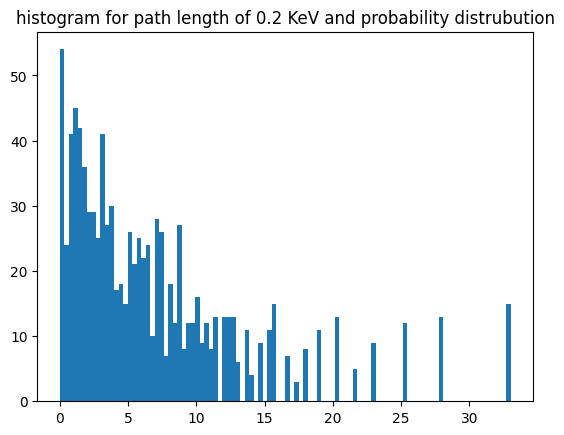

the mean path value for 2KeV is 20.8


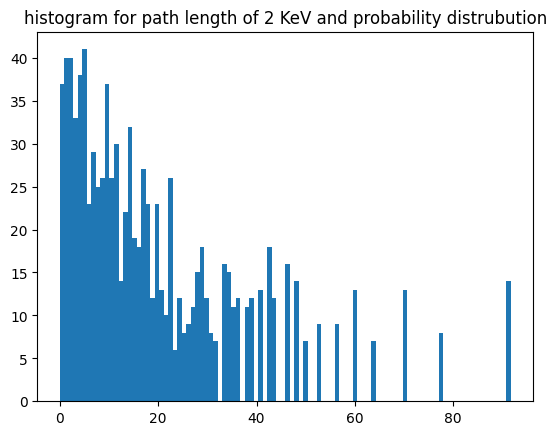

In [13]:
def plot_task3(hv):  #function to plot histogram 
    x = paths(hv)

    plt.title(f'histogram for path length of {hv} KeV and probability distrubution')
    plt.hist(x, bins = 100)
    plt.show()


plot_task3(0.2)
plot_task3(2)

##### task 4 

In [14]:
def scatter(incomming_angle_deg, incomming_energy):
    hv = incomming_energy                             #energy in Mev
    mc2 = 0.511                                       #electron volt mass (Mev)
    phi = np.deg2rad(incomming_angle_deg)             #radians of incomming angle
    c = 3e8                                           #m/s

    new_hv = hv/(1+(hv/mc2)*(1-cos(phi)))
    return new_hv

def diff_scatt(theta, hv):          #energy in MeV, incident angle theta
    mc2 = 0.511                                       #electron volt mass (Mev)
    radius = 2.82*1e-13                               #electron radius in cm
    phi = np.deg2rad(theta)                           #radians of incomming angle
    c = 3e8                                           #m/s

    new_hv = hv/(1+(hv/mc2)*(1-cos(phi)))             #calculating scattered photon energy

    #calculating equation from slide 39, compton cross section
    f1 = (new_hv/hv)**2
    f2 = ((new_hv/hv) + (hv/new_hv) - (sin(phi))**2)
    crosso = (radius**2/2) * f1 * f2                   #with respect to omega

    return new_hv, crosso

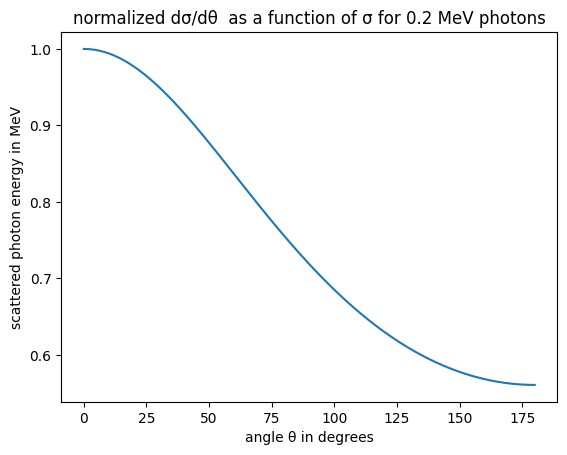

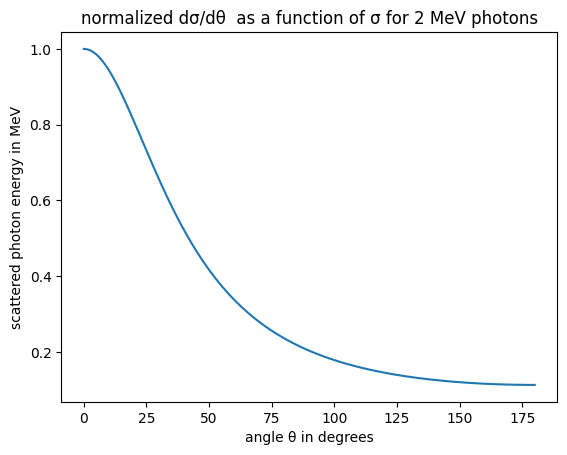

In [15]:
def plot_task4(theta, energy):
    scatter_hv, compton = diff_scatt(theta, energy)

    plt.title(f'normalized d\u03C3/d\u03B8  as a function of \u03C3 for {energy} MeV photons')
    plt.plot(theta, scatter_hv/energy)
    plt.xlabel('angle \u03B8 in degrees')
    plt.ylabel('scattered photon energy in MeV')
    plt.show()

theta = np.linspace(0,180,181)

plot_task4(theta, 0.2)
plot_task4(theta, 2)

##### task 5

In [16]:
def rej_tec(theta, hv):                               #Rejection Technique for compton scattering

    n = 1000                                          #number of simulation
    new_hv, cross_sec = diff_scatt(theta, hv)         #getting curve value that will be used to determine rejection

    norm_hv = np.around(new_hv/hv, decimals=2)        #normalising energy and rounding to two decimal places
    
    cs_max = np.max(cross_sec)                        #value that will be used to de-normalise for simulated values
    
    np.around(cross_sec/cs_max, decimals=2)
    sim_angle, sim_cross = [], []                     #creating emty array to be filled


    for i in range(n*2):
        rand_angle = np.random.randint(0, 180)        #normalised random angle chosen between 0 and 180 degrees
        rand_norm =  np.random.randint(0,100)/100     #getting random normalise number between 0.00 and 1.00
        
        j = np.where(theta == rand_angle)            #getting index of list from the random angle

        if rand_norm <= norm_hv[j]:               #here we check if the random-normalised energy is below or equal to calculated energy
            sim_angle.append(rand_angle)

            sim_cross.append(rand_norm*cs_max)

    return sim_angle, sim_cross

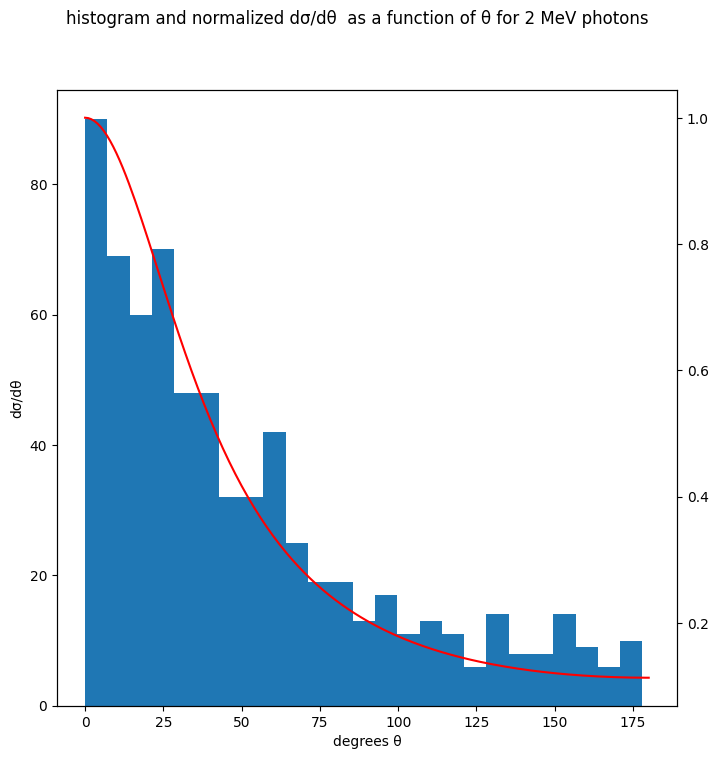

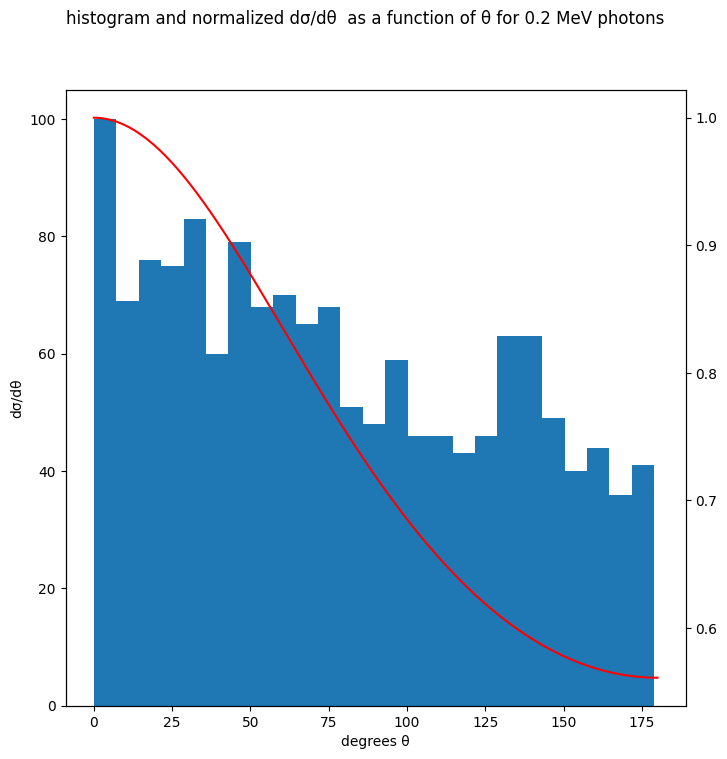

In [18]:
def plot_task5(theta, hv):
    angle, dsdt = rej_tec(theta, hv)
    scatter_hv, compton = diff_scatt(theta, hv)

    fig, ax1 = plt.subplots(figsize=(8, 8))
    ax2 = ax1.twinx()

    ax1.hist(angle, bins = 25)    
    ax2.plot(theta, scatter_hv/hv, 'r')

    ax1.set_xlabel("degrees \u03B8")
    ax1.set_ylabel("d\u03C3/d\u03B8")


    fig.suptitle(f'histogram and normalized d\u03C3/d\u03B8  as a function of \u03B8 for {hv} MeV photons')
    #fig.show()
    plt.show()
    
plot_task5(theta, 2)
plot_task5(theta, 0.2)